# First Look to the Data and Cleaning & Exploring

Water is one of the main sources for people and also countries. Even clean water is worthless. Tanzania is a developing country which has clean water problem. According to [worldometers.info](https://www.worldometers.info/world-population/tanzania-population/), Tanzanian population is 59,353,795 and it has to provide more than 59 million people to clean water. There are many water wells which already established, but also there are many useless wells or some are in need of repair. 

Drivendata has begun a competition 'Pump It Up' to point this problem. With the predictive model, people can understand which water points are functional, nonfunctional and functional but it needs to repair. This model can help the Tanzanian government to find likely maintenance needy wells or give an useful information for future wells. 

Our aim in the project to build a model which tells the status of the water points (as functional, nonfunctional, functional but needs repair). With this model, we will help to the Tanzanian authorities how to use water sources as a productive way. It also helps the investment of the government on wells. 

## Aim of This Notebook 

Aim of this notebook is data understanding, preparation and exploration. In this notebook, we will download data, try to understand the columns meanings. We will also discover what kind of data cleaning is required. With the help of visualizations, we will look at the some features. Then, we will prepare our data to modeling. We will drop some duplicated or uncessary informations or handle null or meaningless valeus.

At the end of the notebook, all explorations, which are obtained by the first look of the data, can be found as a list.

## Data Source

The original data can be obtained by the [DrivenData 'Pump it Up: Data Mining the Water Table' competition](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/). Basically, there are 4 different data sets; submission format, training set, test set and train labels set which contains status of wells.  With given training set and labels set, competitors are wanted to build predictive model and apply it to test set to determine status of the wells and submit. 

In this project, we will use train set and train label set. Train set has 59400 water points data with 40 features. Train labels data has 59400 same water points with train set but just has information about id of these points and status of them.


## Importing Necessary Libraries 

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns

In [2]:
pd.options.display.max_columns=100 # To see the hidden columns in dataframe

In [3]:
df_train_set = pd.read_csv('training_set_values.csv') # train set data

In [4]:
df_train_labels = pd.read_csv('training_set_labels.csv') #train set labels data

# First Look to the Data and Merging Two Dataframes

In [5]:
df_train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [6]:
df_train_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


The index numbers in two data sets look same but it is impossible to check the nearly 60000 points. So, to make sure we assign data sets 'id' as index and after that merge them. 

In [5]:
df_train_set.set_index('id',inplace=True) # setting id as an index to train set

In [6]:
df_train_labels.set_index('id',inplace=True) # setting id as an index to train labels

In [7]:
df = pd.merge(df_train_labels, df_train_set, how = 'inner', left_index = True,right_index=True) #merging two data sets

In [8]:
df.reset_index(inplace=True) # setting a new index 

# Looking at Columns

In [11]:
df.info() #to see the types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
status_group             59400 non-null object
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
p

In [12]:
df.isna().sum() # to see the null values

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [13]:
df.describe() # to see numeric columns detailed

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [15]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

We have highly imbalanced target values. Also, there are some null values and some columns which contain same information in the data set. Now, we will drop them because the same values or dublicated values do not affect our target, and when we simplify our data we can run our models easier. 

### scheme_management / management / management_group columns

In [16]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [17]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

These two columns has nearly same information. Because scheme_management represents who operates the water point, 'management' represents how the water point is managed. There are 3877 null values in 'scheme_management' column so we prefer 'management' column to keep. The column 'management_group' is also keep similar information that how the water point is managed.

In [18]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [19]:
df.loc[df['management_group']=='user-group']['management'].value_counts() # to find sub-groups of this column

vwc            40507
wug             6515
water board     2933
wua             2535
Name: management, dtype: int64

To find the subgroups of 'management_group' column, we checked the 'user-group' values and saw that this column is just the grouped version of 'management'. Although 'management' has more detailed values, we decided to drop 'management_group' column. Also, to remember and check the sub-groups of the 'management_group' column, we grouped it below and saw the numbers of sub-groups (management column).

In [20]:
df.groupby(['management_group','management']).count() 
# to see how many sub-groups have in management group according to management column

id  status_group  amount_tsh  \
management_group management                                          
commercial       company             685           685         685   
                 private operator   1971          1971        1971   
                 trust                78            78          78   
                 water authority     904           904         904   
other            other               844           844         844   
                 other - school       99            99          99   
parastatal       parastatal         1768          1768        1768   
unknown          unknown             561           561         561   
user-group       vwc               40507         40507       40507   
                 water board        2933          2933        2933   
                 wua                2535          2535        2535   
                 wug                6515          6515        6515   

                                   date_recorded  funder  gps_height  \
management_group management                                            
commercial       company                     685     663         685   
                 private operator           1971    1957        1971   
                 trust                        78      78          78   
                 water authority             904     836         904   
other            other                       844     837         844   
                 other - school               99      99          99   
parastatal       parastatal                 1768    1624        1768   
unknown          unknown                     561     533         561   
user-group       vwc                       40507   37632       40507   
                 water board                2933    2715        2933   
                 wua                        2535    2308        2535   
                 wug                        6515    6483        6515   

                                   installer  longitude  latitude  wpt_name  \
management_group management                                                   
commercial       company                 663        685       685       685   
                 private operator       1959       1971      1971      1971   
                 trust                    78         78        78        78   
                 water authority         836        904       904       904   
other            other                   831        844       844       844   
                 other - school           99         99        99        99   
parastatal       parastatal             1626       1768      1768      1768   
unknown          unknown                 527        561       561       561   
user-group       vwc                   37630      40507     40507     40507   
                 water board            2714       2933      2933      2933   
                 wua                    2309       2535      2535      2535   
                 wug                    6473       6515      6515      6515   

                                   num_private  basin  subvillage  region  \
management_group management                                                 
commercial       company                   685    685         685     685   
                 private operator         1971   1971        1932    1971   
                 trust                      78     78          78      78   
                 water authority           904    904         895     904   
other            other                     844    844         839     844   
                 other - school             99     99          99      99   
parastatal       parastatal               1768   1768        1768    1768   
unknown          unknown                   561    561         561     561   
user-group       vwc                     40507  40507       40189   40507   
                 water board              2933   2933        2933    2933   
                 

### quantity / quantity_group columns

In [20]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [21]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These two columns contain same information so we decided to drop 'quantity_group' column.

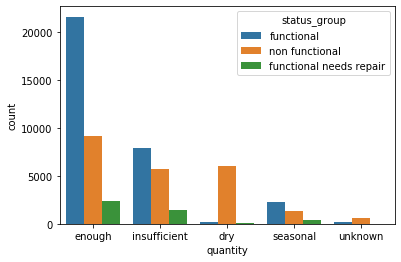

In [22]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

It can be seen obviously that although there are enough water quantity in some wells, they are non-functional. When looking at this graph, dry quantity water points have a highly correlation with non-functionality. If the water point is dry or unknown, there is high chance thw water point is non functional. On the other hand, if the quantity is enough, there is a higher chance to find functional water points.

#### source / source_type / source_class columns

In [23]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [24]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [25]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [26]:
df.groupby(['source_class','source']).count()
# to see how many sub-groups have in source_class according to source column

id  status_group  amount_tsh  \
source_class source                                                  
groundwater  hand dtw                874           874         874   
             machine dbh           11075         11075       11075   
             shallow well          16824         16824       16824   
             spring                17021         17021       17021   
surface      dam                     656           656         656   
             lake                    765           765         765   
             rainwater harvesting   2295          2295        2295   
             river                  9612          9612        9612   
unknown      other                   212           212         212   
             unknown                  66            66          66   

                                   date_recorded  funder  gps_height  \
source_class source                                                    
groundwater  hand dtw                        874     868         874   
             machine dbh                   11075   10252       11075   
             shallow well                  16824   16302       16824   
             spring                        17021   15870       17021   
surface      dam                             656     647         656   
             lake                            765     763         765   
             rainwater harvesting           2295    2099        2295   
             river                          9612    8715        9612   
unknown      other                           212     204         212   
             unknown                          66      45          66   

                                   installer  longitude  latitude  wpt_name  \
source_class source                                                           
groundwater  hand dtw                    868        874       874       874   
             machine dbh               10246      11075     11075     11075   
             shallow well              16286      16824     16824     16824   
             spring                    15870      17021     17021     17021   
surface      dam                         646        656       656       656   
             lake                        762        765       765       765   
             rainwater harvesting       2096       2295      2295      2295   
             river                      8721       9612      9612      9612   
unknown      other                       204        212       212       212   
             unknown                      46         66        66        66   

                                   num_private  basin  subvillage  region  \
source_class source                                                         
groundwater  hand dtw                      874    874         874     874   
             machine dbh                 11075  11075       10849   11075   
             shallow well                16824  16824       16817   16824   
             spring                      17021  17021       16886   17021   
surface      dam                           656    656         656     656   
             lake                          765    765         764     765   
             rainwater harvesting         2295   2295        2293    2295   
             river                        9612   9612        9612    9612   
unknown      other                         212    212         212     212   
             unknown                        66     66          66      66   

                                   region_code  district_code    lga   ward  \
source_class source                                                           
groundwater  hand dtw                      874            874    874    874   
             machine dbh                 11075          11075  11075  11075   
             shallow well                16824          16824  16824  16824   
             spring                      17021          17021  

It is obvious that these three columns keep same information. so, we decided to keep just 'source' column, because it has more detailed information and we will drop others.

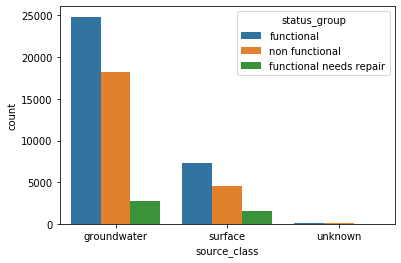

In [27]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

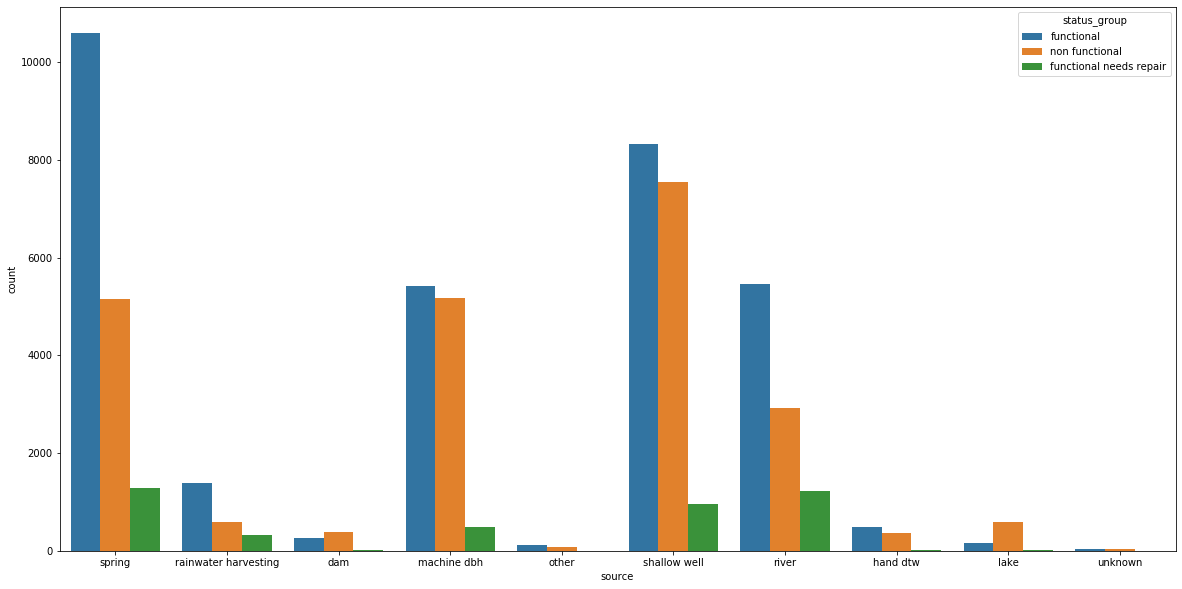

In [28]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

When we look at the columns, there are lots of non-functional ground water. And, it is interesting that machine dbh and swallow well sources nearly have same functional and non-functional waterpoints.

### water_quality / quality_group columns

In [29]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [30]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

'water_quality' column has more unique values, so we will keep 'water_quality' and drop 'quality_group'.

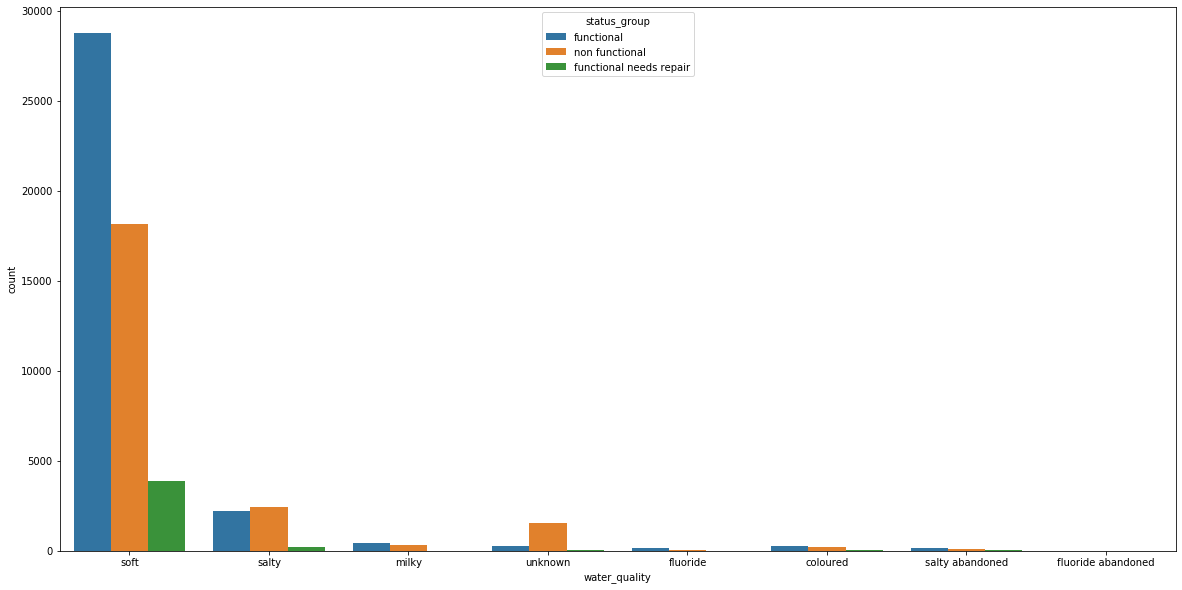

In [31]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

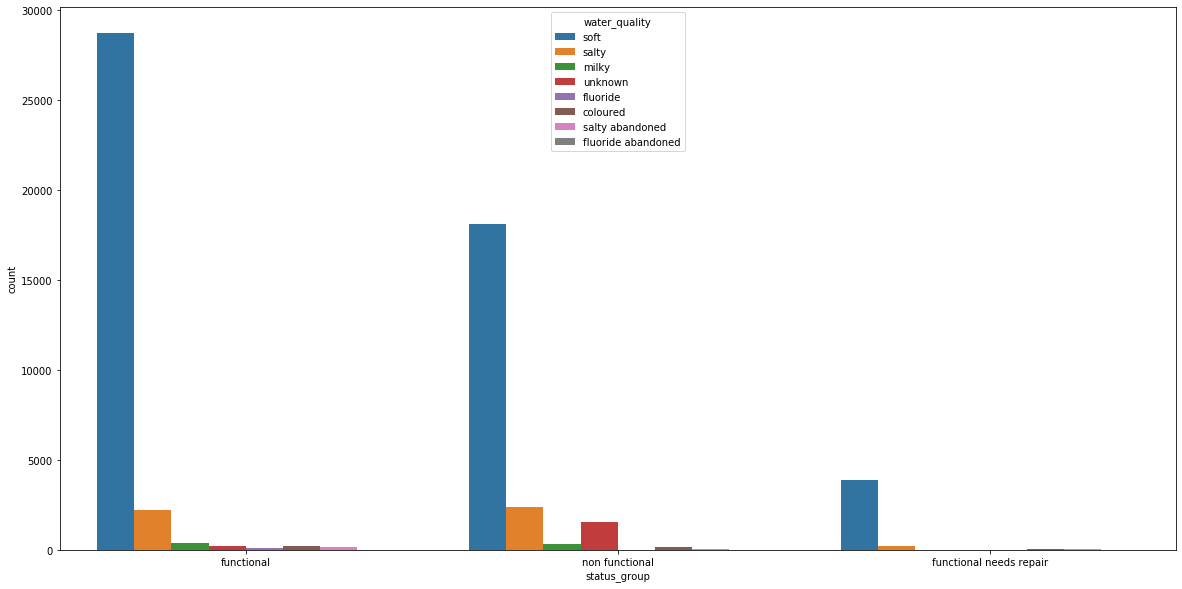

In [32]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)

From the graphs, it is seen that lots of non-functional water points have soft, good water quality.

### payment / payment_type columns

In [33]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [34]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

These two columns are same so we decided to drop one of them.

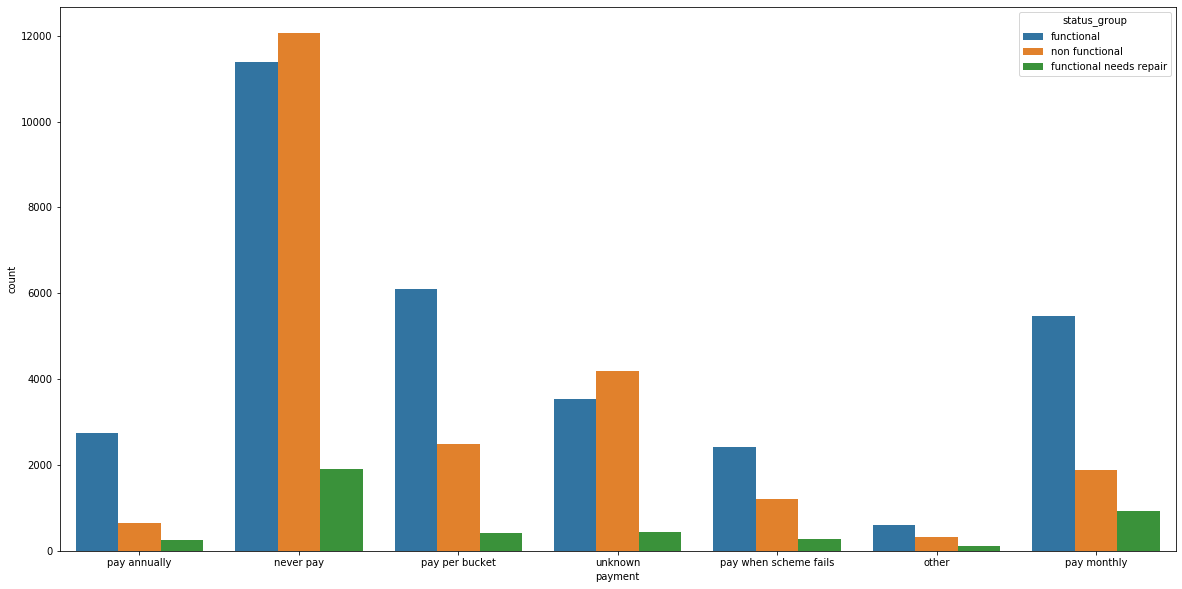

In [35]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

This feature shows us what the water cost. Mostly, there are lots of non-functioal water points as never paid for them. 

### extraction_type / extraction_type_group / extraction_type_class columns

In [36]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [37]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [38]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [39]:
df.groupby(['extraction_type_class','extraction_type_group']).count()
# to see how many sub-groups have in extraction_type_clas according to extraction_type_group

id  status_group  amount_tsh  \
extraction_type_class extraction_type_group                                    
gravity               gravity                26780         26780       26780   
handpump              afridev                 1770          1770        1770   
                      india mark ii           2400          2400        2400   
                      india mark iii            98            98          98   
                      nira/tanira             8154          8154        8154   
                      other handpump           364           364         364   
                      swn 80                  3670          3670        3670   
motorpump             mono                    2865          2865        2865   
                      other motorpump          122           122         122   
other                 other                   6430          6430        6430   
rope pump             rope pump                451           451         451   
submersible           submersible             6179          6179        6179   
wind-powered          wind-powered             117           117         117   

                                             date_recorded  funder  \
extraction_type_class extraction_type_group                          
gravity               gravity                        26780   24704   
handpump              afridev                         1770    1668   
                      india mark ii                   2400    2358   
                      india mark iii                    98      98   
                      nira/tanira                     8154    7899   
                      other handpump                   364     353   
                      swn 80                          3670    3596   
motorpump             mono                            2865    2577   
                      other motorpump                  122     122   
other                 other                           6430    6010   
rope pump             rope pump                        451     448   
submersible           submersible                     6179    5820   
wind-powered          wind-powered                     117     112   

                                             gps_height  installer  longitude  \
extraction_type_class extraction_type_group                                     
gravity               gravity                     26780      24714      26780   
handpump              afridev                      1770       1665       1770   
                      india mark ii                2400       2358       2400   
                      india mark iii                 98         98         98   
                      nira/tanira                  8154       7885       8154   
                      other handpump                364        354        364   
                      swn 80                       3670       3593       3670   
motorpump             mono                         2865       2578       2865   
                      other motorpump               122        122        122   
other                 other                        6430       6002       6430   
rope pump             rope pump                     451        448        451   
submersible           submersible                  6179       5816       6179   
wind-powered          wind-powered                  117        112        117   

                                             latitude  wpt_name  num_private  \
extraction_type_class extraction_type_group                                    
gravity               gravity                   26780     26780        26780   
handpump              afridev                    1770      1770         1770   
                      india mark ii              2400      2400         2400   
                      india mark iii               98        98           98   
                      nira/tanira                8154      8154         8154   
                    

It is obviously seen that these three columns keep same information. So, we decided to keep 'extraction_type_group' and drop others. Although, extraction_type has more unique values than extraction_type_group , some of these values are very small amount according to this big dataset. We prefered to use more compact one. Also, extraction_type_class contains less detail. So, extraction_type_group is chosen to keep.

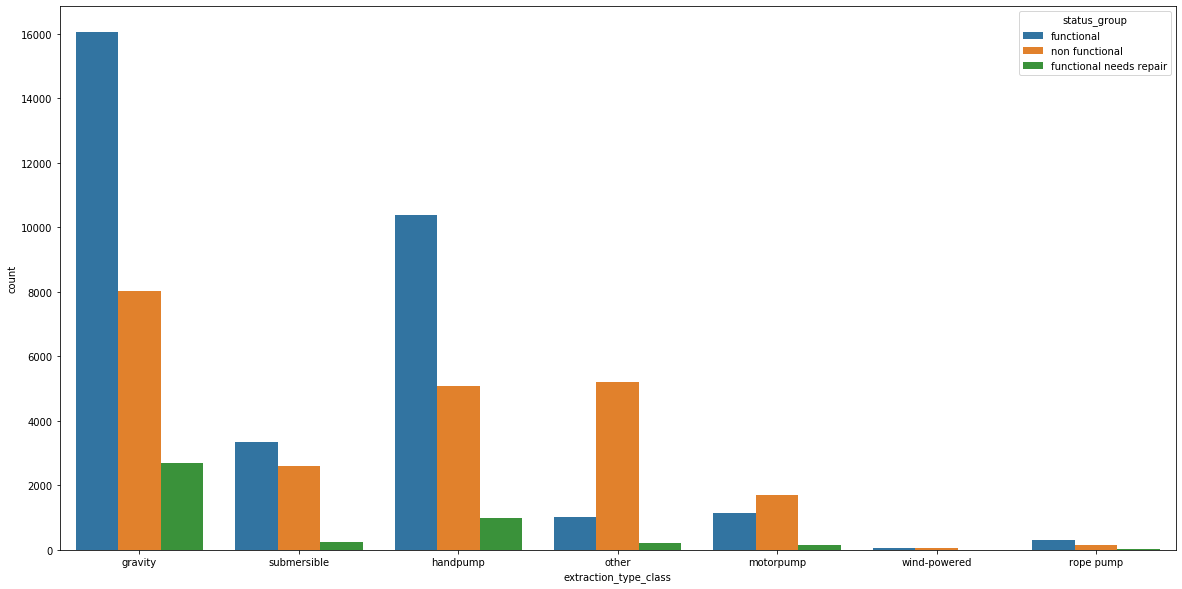

In [40]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)

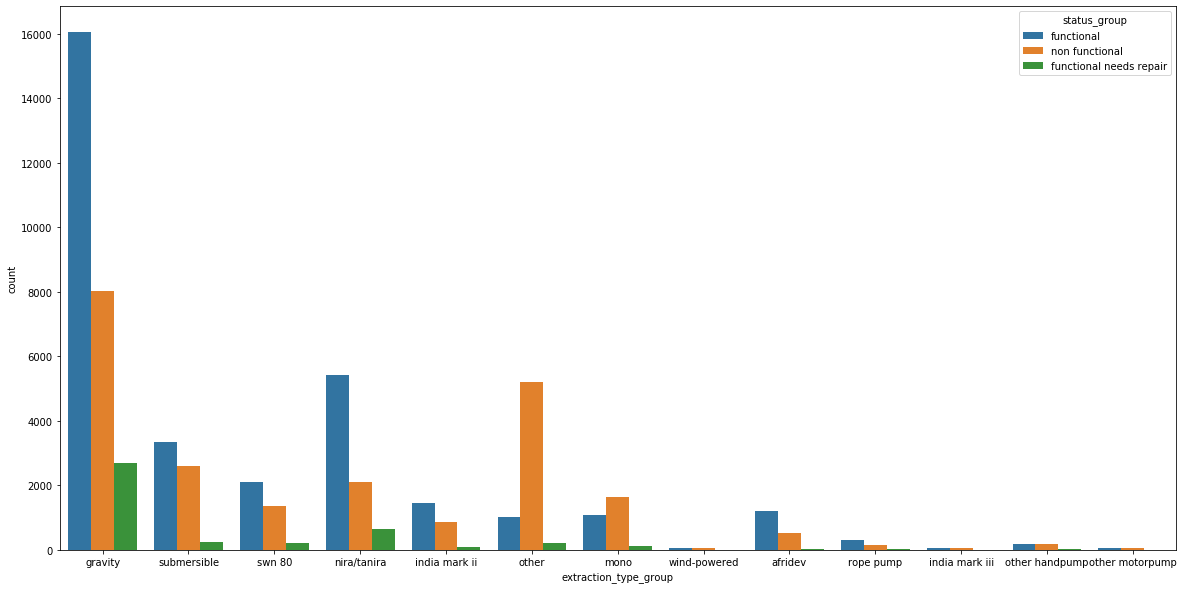

In [41]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

Especially, other and mono extraction types have higher change to be non-functional than functional.

### waterpoint_type / waterpoint_type_group

In [42]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [43]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

We decided to keep 'waterpoint_type' which contains more detail.

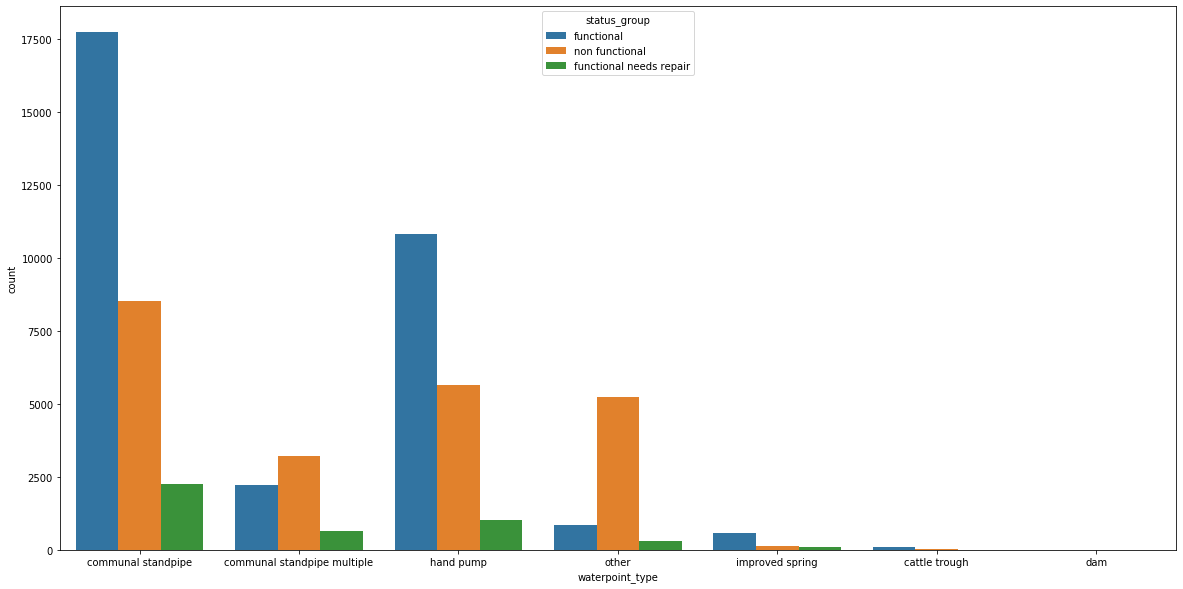

In [44]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

It can be seen that waterpoint type has correlation with funtionality of water points. Such that, communal standpipe has higher possibility to have functional, although communal standpipe multiple and others have higher possibility for non-functionality.

# Dropping Similar Columns

In [9]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

# Continue to Exploring Columns

We continue to check data for finding unnecessary or wrong values.

### construction_year column

In [46]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

New feature is added to the dataset. The year values are converted to decades for future encoding. Zero shows the missing values. This have majority of the data set so, it will not be changed to the mean or median, kept as new value in decades.

In [22]:
df['decade'] = df['construction_year'] #creating new columns

In [23]:
# dividing the column decades

df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [24]:
df['decade'].value_counts()

0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: decade, dtype: int64

In [25]:
df.loc[df['construction_year']!=0].describe() # finding mean and median without zero values

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,466.457534,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,3541.036030,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,200.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [26]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column

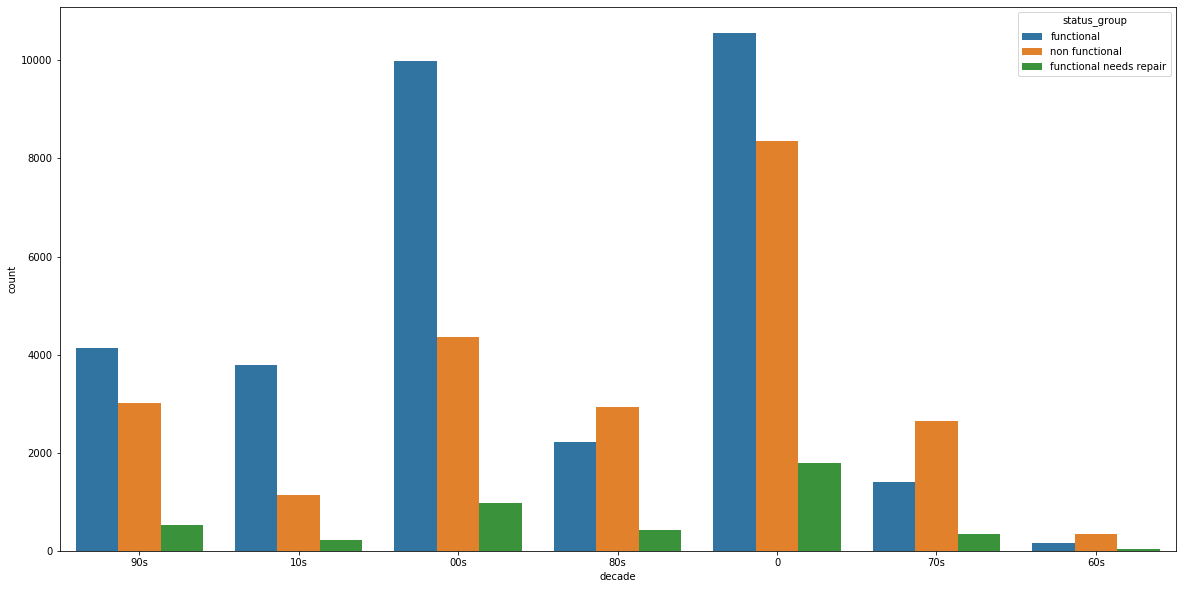

In [52]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=df)

It is obviously seen that missing values and most recent years have more functional water points.

### recorded_by column

In [27]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

The recorded_by column has one value. This will not give any information to our model. So, we dropped it also.

In [28]:
df.drop(columns=['recorded_by'],inplace=True ) #dropping the column

### installer column

There are lots of NaN and 0 values in this column. Firstly, we will convert them to unknown.

In [29]:
df['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown

In [30]:
df['installer'].value_counts().head(100).sum() # to check the first common 100 values sum

47237

In [31]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [32]:
# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories

# Replacing the spelling mistakes and collect same categories in same name

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [33]:
# continue to replacing spellin mistakes and getting together values
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [34]:
(47237*100)/59400 # percentage of seeing value counts of installer

79.52356902356902

We checked the first 100 value counts of installer column. Because we realized some installer names are written with mistake and given as different like 'District Council' and 'District council'. So, we will change the values which we realied. The first 100 value counts contains 47237 values. It means 79.5% of data is checked.

Now we want to see most common 20 values and visualize them to see the functionality. For this plot, we will not take the values which are smaller than 400. Because this amount does not have majority in this data and it is not good to see thousands of values in same graph. 

In [61]:
df['installer'].value_counts().head(20) #taking most 20 common installer

DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
LGA                     408
villagers               408
WEDECO                  397
TASAF                   396
Unicef                  332
Name: installer, dtype: int64

In [35]:
# Creating new dataframe which just picks our desired values

df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

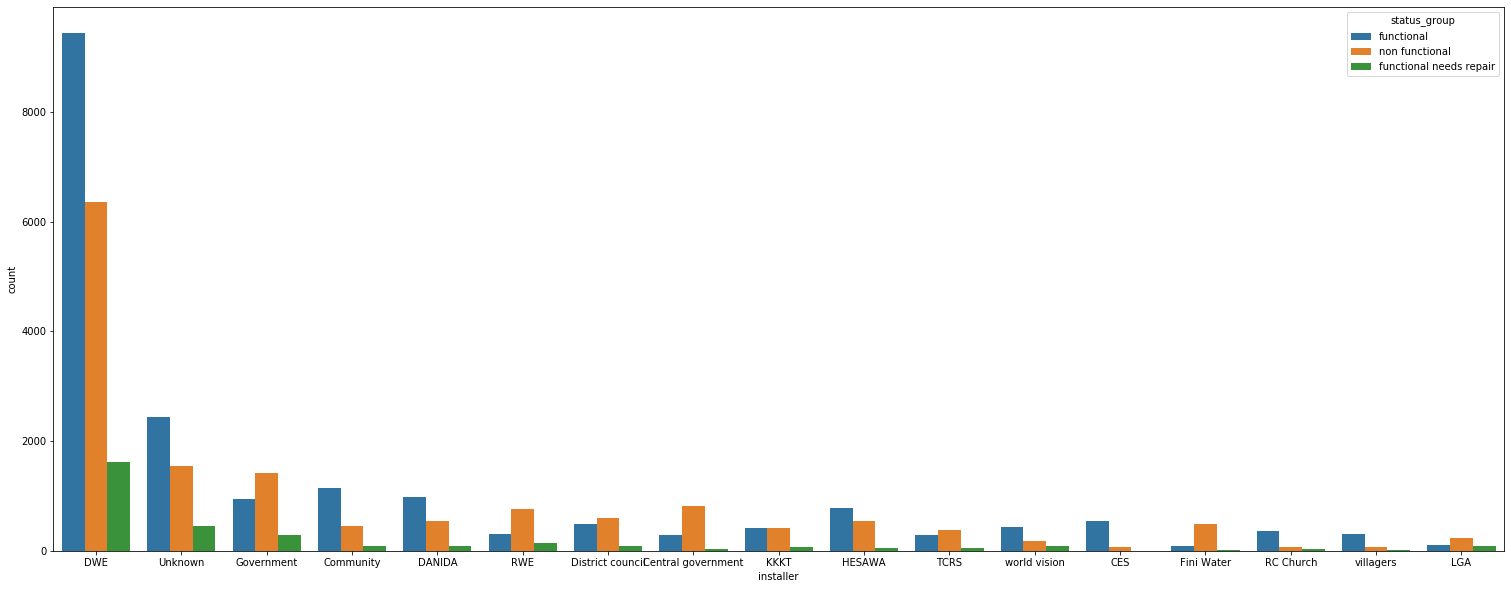

In [63]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=df_installer)

It is interesting that most of water points which central government and district council installed are non-functional. DWE has the majority of functional wells but has also many non-functional wells.

To ease our encoding later on, we will collect installers which has less than 400 value counts together and named them others.

In [36]:
df['installer_cat'] = df['installer'] # To make new categorizes, creating new column

In [37]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

Now, we have new feature as installer_cat with 17 unique values.

### funder column

In [38]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [67]:
df['funder'].value_counts().head(20)

Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

This column is highly categorical column with thousands different values. So, we will take most common 20 values for future encoding.

In [39]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

[Text(0, 0, 'Government Of Tanzania'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Danida'),
 Text(0, 0, 'Hesawa'),
 Text(0, 0, 'Rwssp'),
 Text(0, 0, 'World Bank'),
 Text(0, 0, 'Kkkt'),
 Text(0, 0, 'World Vision'),
 Text(0, 0, 'Unicef'),
 Text(0, 0, 'Tasaf'),
 Text(0, 0, 'District Council'),
 Text(0, 0, 'Dhv'),
 Text(0, 0, 'Private Individual'),
 Text(0, 0, 'Dwsp'),
 Text(0, 0, 'Norad'),
 Text(0, 0, 'Germany Republi'),
 Text(0, 0, 'Tcrs'),
 Text(0, 0, 'Ministry Of Water'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Dwe')]

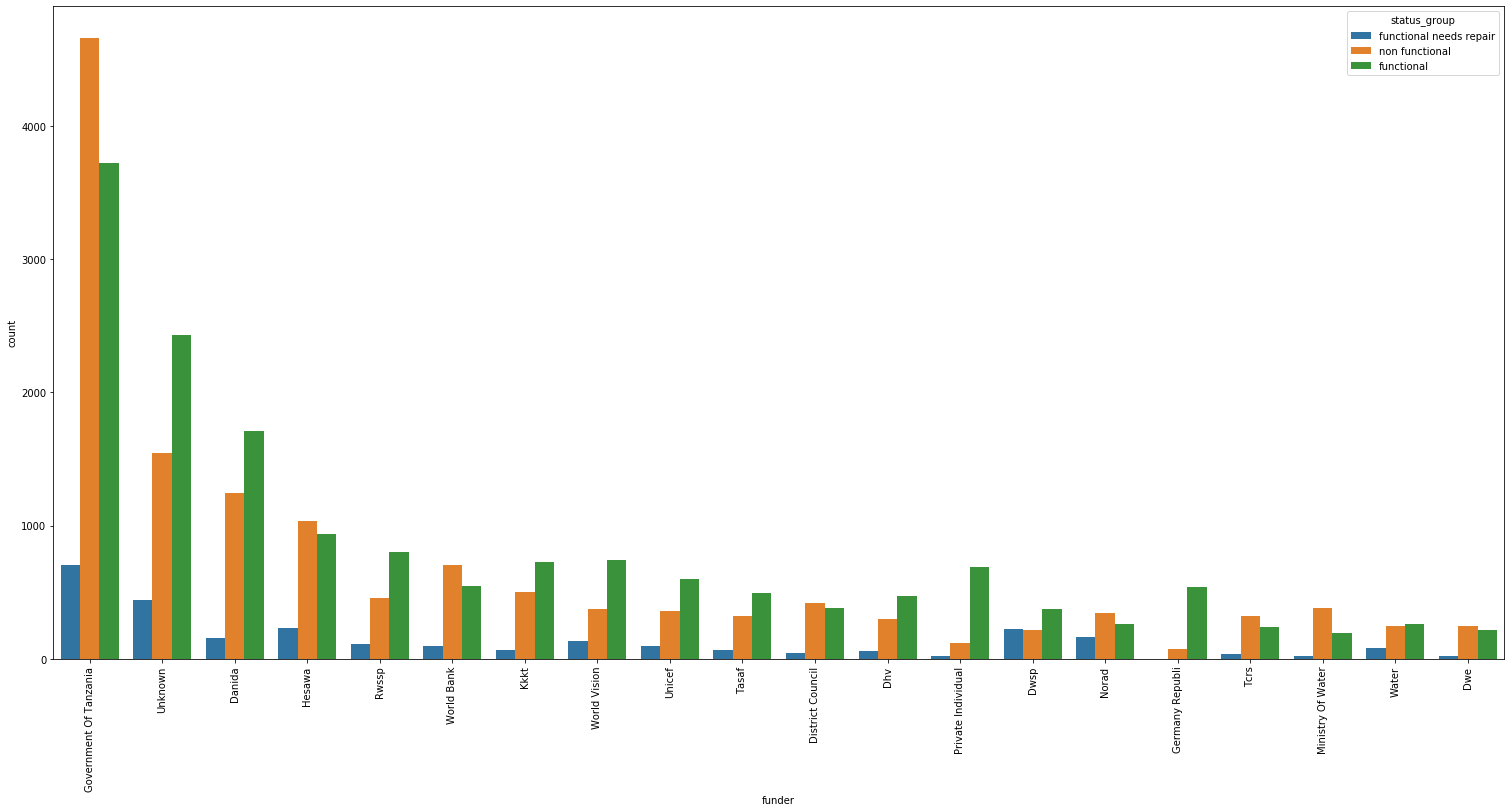

In [69]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

From the above plot, we realize that most of the water points which funded by government are non-functional.

In [40]:
# To collect values together

df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [41]:
df['funder_cat'].nunique() # We have 21 unique values for this column

21

### longitude column

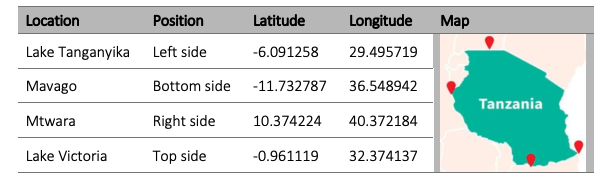

In [151]:
from IPython.display import Image
Image(filename='map.png')

The image above was taken from https://lib.ugent.be/fulltxt/RUG01/002/350/680/RUG01-002350680_2017_0001_AC.pdf to see the Tanzanian location and check the column values. Right side latitude must be -10.37.

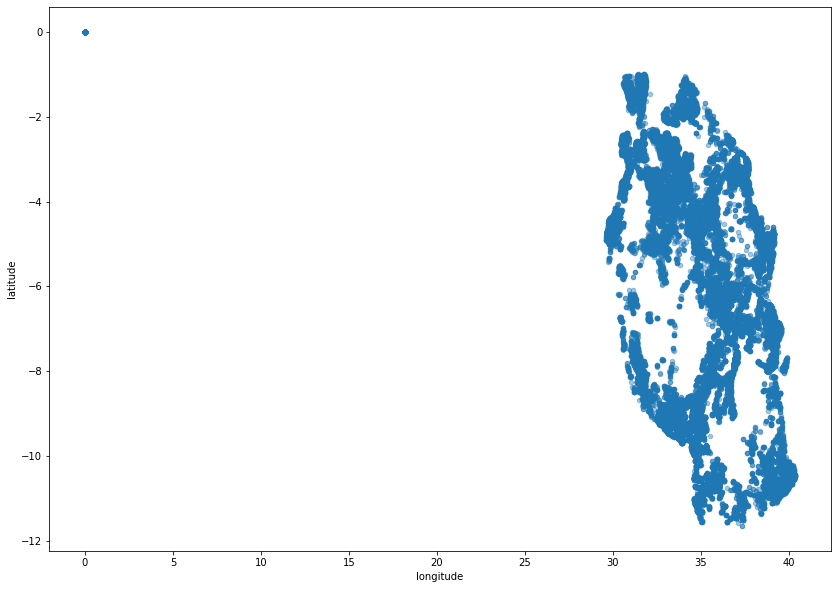

In [72]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, figsize=(14,10),sharex=False);
# To see the outliers

In [73]:
df.loc[df['longitude']==0] # to check outside of Tanzania

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_name,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
21,6091,functional,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,NaN,False,2000,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,0,DWE,Dwsp
53,32376,non functional,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,Nyang'hwale,True,2000,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe multiple,0,Government,Government Of Tanzania
168,72678,functional,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,NaN,False,2000,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
177,56725,non functional,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,NaN,False,2000,other,wug,unknown,soft,enough,shallow well,other,0,DWE,Others
253,13042,functional needs repair,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,NaN,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,DWE,Hesawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,functional needs repair,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,NaN,False,2000,nira/tanira,wug,other,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59208,3631,functional,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59295,60843,functional needs repair,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,NaN,False,2000,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,0,DWE,Rwssp
59324,748,functional,0.0,2013-01-22,World Vision,0,world vision,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,world vision,World Vision


In [74]:
df.loc[df['longitude']!=0].describe() # to find the non-zero values mean

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,57588.00000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000
mean,37106.48807,327.645219,689.325137,35.149669,-5.885572,0.489060,15.217615,5.728311,185.570831,1997.859919
std,21454.51421,3043.831403,693.564188,2.607428,2.809876,12.426954,17.855254,9.760254,477.744239,10.331744
min,0.00000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18522.75000,0.000000,0.000000,33.285100,-8.643841,0.000000,5.000000,2.000000,0.000000,1995.000000
50%,37054.50000,0.000000,426.000000,35.005943,-5.172704,0.000000,12.000000,3.000000,35.000000,2000.000000
75%,55667.25000,30.000000,1332.000000,37.233712,-3.372824,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74247.00000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000


It is obviously seen that it is written as 0 when the longtitude is unknown. Because, the zero points can seen easily in the graph above outliers and outside of Tanzania. So, we changed them to mean where median is the almost same value.

In [42]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # changing 0 values to mean

### wpt_name / scheme_name / id/ region/ region_code columns

In [76]:
df['wpt_name'].value_counts()

none                3563
Shuleni             1748
Zahanati             830
Msikitini            535
Kanisani             323
                    ... 
Kamena Secondary       1
Masunkune B            1
Kitera                 1
Kwa Likenawaka         1
Ramson Mwamulima       1
Name: wpt_name, Length: 37400, dtype: int64

In [77]:
df['scheme_name'].value_counts()

K                         682
None                      644
Borehole                  546
Chalinze wate             405
M                         400
                         ... 
Michee Borehole Scheme      1
Mafuriko  Water Supp        1
Villagers                   1
Kala                        1
Mtumbei mpopera             1
Name: scheme_name, Length: 2696, dtype: int64

In [78]:
df.duplicated(subset='id', keep='first').sum() # to check the dublicates of id

0

In [43]:
df.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )

When we checked the wpt_name, scheme_name and id columns, they do not have any information about functionality. So, we decide to drop them. We dropped also region_code column because region column gives more information about the region. Also, before dropping columns we check the dublicated values in dataframe.

In [80]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

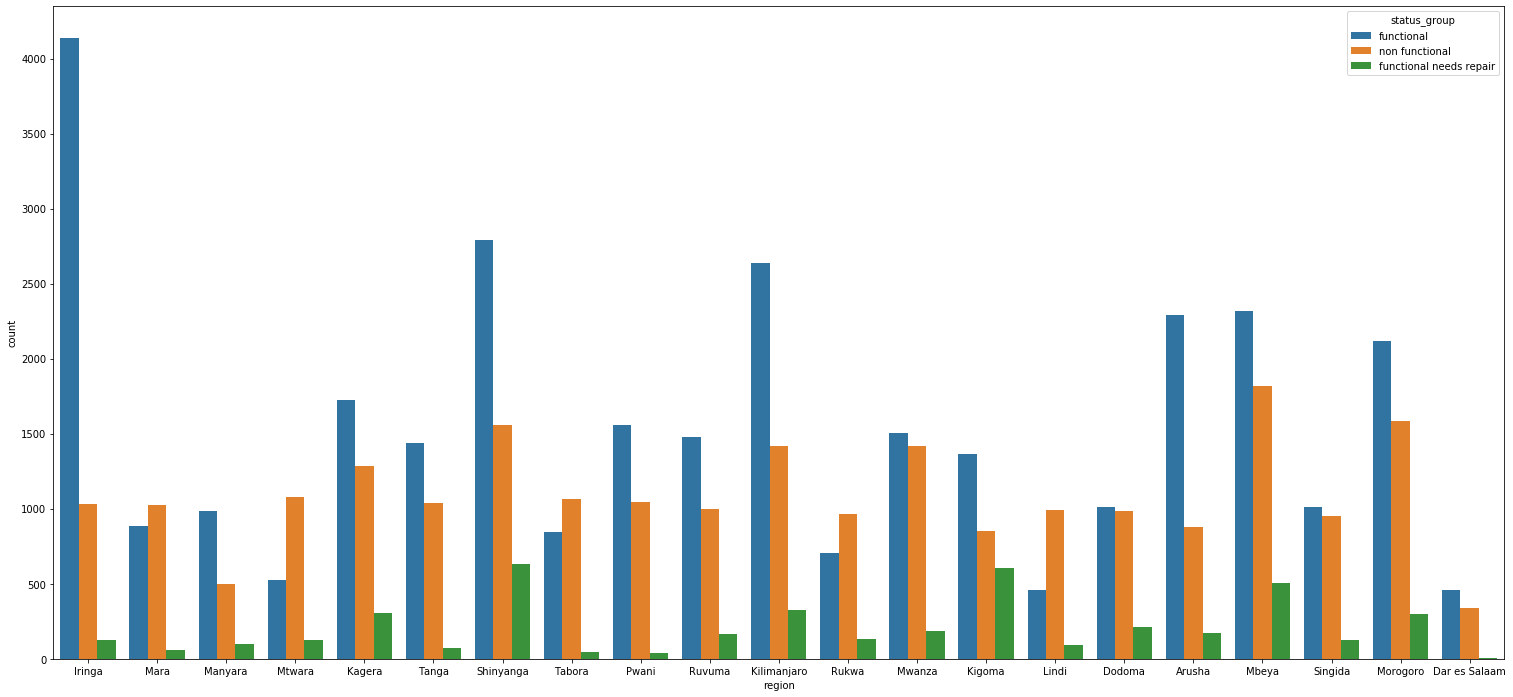

In [81]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df)

Some regions has higher probability of functional water well. Klimanjaro and Arusha have Pangani basin which has higher water point between basins. It is also seen that they have higher portions for functional wells. 

In [31]:
df_iringa =df.loc[df['region']=='Iringa'] #to see the Iringa area

In [32]:
df_iringa.groupby(['water_quality','status_group']).count()

id  amount_tsh  date_recorded  \
water_quality status_group                                               
coloured      functional                  1           1              1   
              non functional              1           1              1   
salty         functional                 19          19             19   
              non functional              8           8              8   
soft          functional               4120        4120           4120   
              functional needs repair   123         123            123   
              non functional            983         983            983   
unknown       functional                  1           1              1   
              non functional             38          38             38   

                                       funder  gps_height  installer  \
water_quality status_group                                             
coloured      functional                    1           1          1   
              non functional                1           1          1   
salty         functional                   19          19         19   
              non functional                8           8          8   
soft          functional                 4114        4120       4115   
              functional needs repair     123         123        123   
              non functional              980         983        982   
unknown       functional                    1           1          1   
              non functional               38          38         38   

                                       longitude  latitude  wpt_name  \
water_quality status_group                                             
coloured      functional                       1         1         1   
              non functional                   1         1         1   
salty         functional                      19        19        19   
              non functional                   8         8         8   
soft          functional                    4120      4120      4120   
              functional needs repair        123       123       123   
              non functional                 983       983       983   
unknown       functional                       1         1         1   
              non functional                  38        38        38   

                                       num_private  basin  subvillage  region  \
water_quality status_group                                                      
coloured      functional                         1      1           1       1   
              non functional                     1      1           1       1   
salty         functional                        19     19          19      19   
              non functional                     8      8           8       8   
soft          functional                      4120   4120        4120    4120   
              functional needs repair          123    123         123     123   
              non functional                   983    983         983     983   
unknown       functional                         1      1           1       1   
              non functional                    38     38          38      38   

                                       region_code  district_code   lga  ward  \
water_quality status_group                                                      
coloured      functional                         1              1     1     1   
              non functional                     1              1     1     1   
salty         functional                        19             19    19    19   
              non functional                     8              8     8     8   
soft          functional                      4120           4120  4120  4120   
              functional needs repair          123            123   123   123   
              non functional                   983            983   983   983   
unknown       funct

When we looked at the Iringa area which has higher water points. There are also 983 wells which has soft, good water but non-functional. 

In [33]:
df_daressalaam =df.loc[df['region']=='Dar es Salaam'] #to see the Dar es Salaam area

In [34]:
df_daressalaam.groupby(['water_quality','status_group']).count()

id  amount_tsh  date_recorded  \
water_quality      status_group                                              
fluoride abandoned non functional             2           2              2   
milky              functional                 1           1              1   
                   non functional             1           1              1   
salty              functional                41          41             41   
                   non functional           100         100            100   
salty abandoned    functional                63          63             63   
                   non functional            37          37             37   
soft               functional               352         352            352   
                   functional needs repair    3           3              3   
                   non functional           186         186            186   
unknown            functional                 4           4              4   
                   non functional            15          15             15   

                                            funder  gps_height  installer  \
water_quality      status_group                                             
fluoride abandoned non functional                2           2          2   
milky              functional                    1           1          1   
                   non functional                1           1          1   
salty              functional                   41          41         41   
                   non functional              100         100        100   
salty abandoned    functional                   56          63         56   
                   non functional               36          37         36   
soft               functional                  343         352        343   
                   functional needs repair       3           3          3   
                   non functional              176         186        176   
unknown            functional                    4           4          4   
                   non functional               14          15         14   

                                            longitude  latitude  wpt_name  \
water_quality      status_group                                             
fluoride abandoned non functional                   2         2         2   
milky              functional                       1         1         1   
                   non functional                   1         1         1   
salty              functional                      41        41        41   
                   non functional                 100       100       100   
salty abandoned    functional                      63        63        63   
                   non functional                  37        37        37   
soft               functional                     352       352       352   
                   functional needs repair          3         3         3   
                   non functional                 186       186       186   
unknown            functional                       4         4         4   
                   non functional                  15        15        15   

                                            num_private  basin  subvillage  \
water_quality      status_group                                              
fluoride abandoned non functional                     2      2           2   
milky              functional                         1      1           1   
                   non functional                     1      1           1   
salty              functional                        41     41          41   
                   non functional                   100    100         100   
salty abandoned    functional                        63     63          63   
                   non functional                    37     37          37   
soft               functional                       352    352         352   
              

It is very sad that Dar us Salaam is most populated area in Tanzania with its rural areas around, but water points are not enough. Even, 35% of the soft water wells are non-functional. 

### amount_tsh column

![title](tsh.png)

Total static head shows us the height of the flow from the surface. Mostly there are zero values in our dataset. But for zero values no need for pump , because it means we are already in surface. 

In [82]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [83]:
df.loc[df['amount_tsh']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,19706,19706,19706,19706,19706,19706,19706,19706,19706,19501,19706,19706,19706,19706,19706,18444,18374,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706
functional needs repair,3048,3048,3048,3048,3048,3048,3048,3048,3048,3047,3048,3048,3048,3048,3048,2906,2775,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
non functional,18885,18885,18885,18885,18885,18885,18885,18885,18885,18720,18885,18885,18885,18885,18885,17475,17862,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885


In [84]:
df['amount_tsh'].value_counts()/df['amount_tsh'].count()

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

We decided to drop this column because 70% of the column has no informative values. So, this column will not give idea to our model and we will drop it.

In [44]:
df.drop(columns=['amount_tsh'],inplace=True )

### gps_height column

In [86]:
df.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
functional,740.131188
functional needs repair,627.607135
non functional,574.464774


In [87]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [88]:
df['gps_height'].value_counts()/df['gps_height'].count()

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
-20      0.000875
           ...   
 2285    0.000017
 2424    0.000017
 2552    0.000017
 2413    0.000017
 2385    0.000017
Name: gps_height, Length: 2428, dtype: float64

Gps height shows the level of the water point from sea level. There are 34% zero values but maybe 34% of the water points are at the sea level so we do not change this column now.

### population column

In [89]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [90]:
df.loc[df['population']==0].groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11274,11274,11071,11274,11274,11274,11274,11274,10700,10596,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1732,1613,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8332,8332,8174,8332,8332,8332,8332,8332,7967,8063,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


Some functional water points has zero population, it is weird so we will change zero population to mean.

In [91]:
df.loc[df['population']!=0].describe() # to see without zero mean and median

,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,969.889634,36.074387,-6.139781,0.740788,6.299456,281.087167,1996.908283
std,612.544787,2.586779,2.737733,15.288297,11.303334,564.687660,12.425377
min,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000,1960.000000
25%,347.000000,34.715340,-8.388839,0.000000,2.000000,40.000000,1988.000000
50%,1135.000000,36.706815,-5.750877,0.000000,3.000000,150.000000,2000.000000
75%,1465.000000,37.940149,-3.597016,0.000000,5.000000,324.000000,2008.000000
max,2770.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000,2013.000000


In [45]:
df['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean

In [93]:
df.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,34,39,39,39,39,39,39,39,39,39,39,39
functional needs repair,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4,4
non functional,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


To see the most populated areas water point functionality , we choose crowded 50 values and did groupby. It shows that higher population areas have more functional water points.


### date_recorded column

Approximately 95% of the water points were recorded between 2011-2013. So, for now we do not think it contains necessary information about functionality. We drop this column for now.

In [46]:
df.drop(columns=['date_recorded'],inplace=True )

### num_private column

This column has no information about it and also mostly have zero values. So, we drop this also.

In [47]:
df.drop(columns=['num_private'],inplace=True )

### basin column

In [96]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

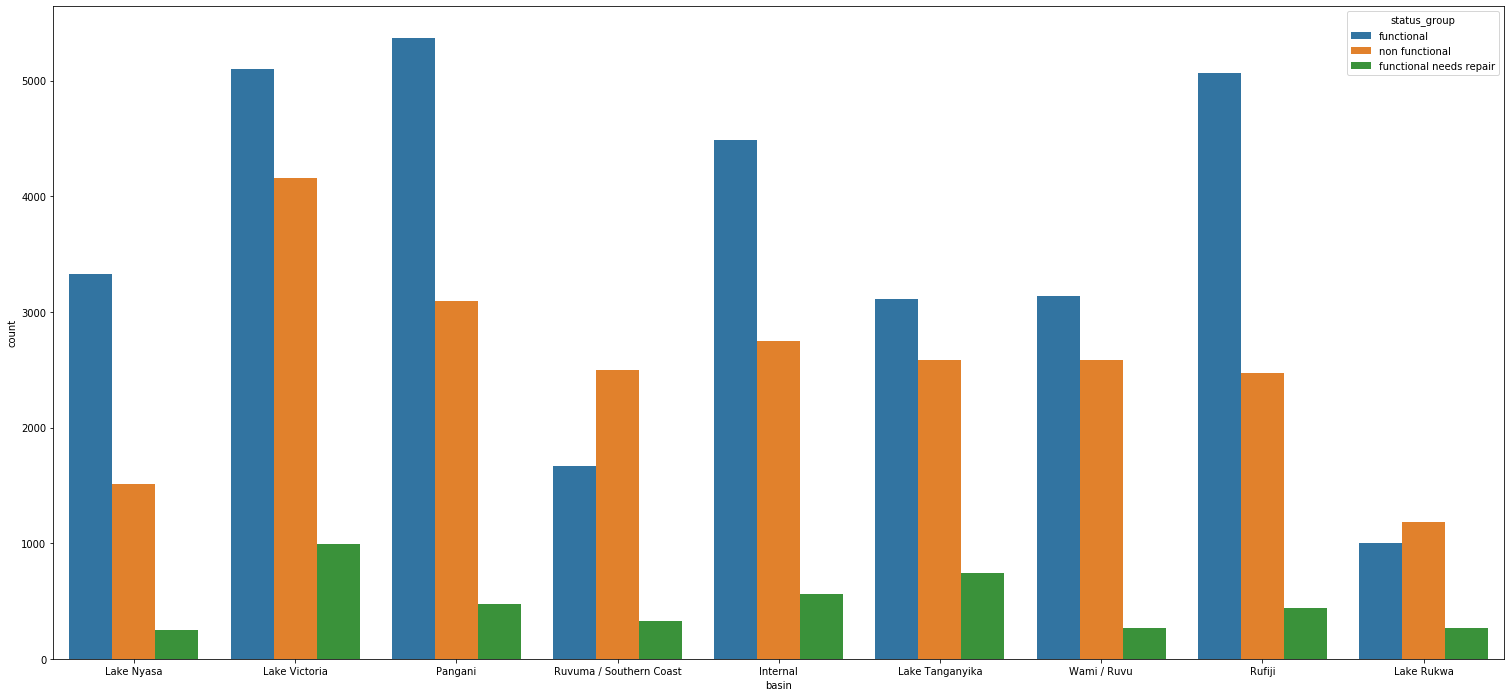

In [97]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='basin', hue="status_group", data=df)

This column gives an idea about there is correlation between functionality and geographical water basin.

### subvillage column

In [98]:
df['subvillage'].nunique()

19287

This column has location value of water point regions but we already have region column. We will drop this, because it is hard to handle this nunique object values.

In [48]:
df.drop(columns=['subvillage'],inplace=True )

### district_code column

In [100]:
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

It includes numeric values about districts. Each district has one number.

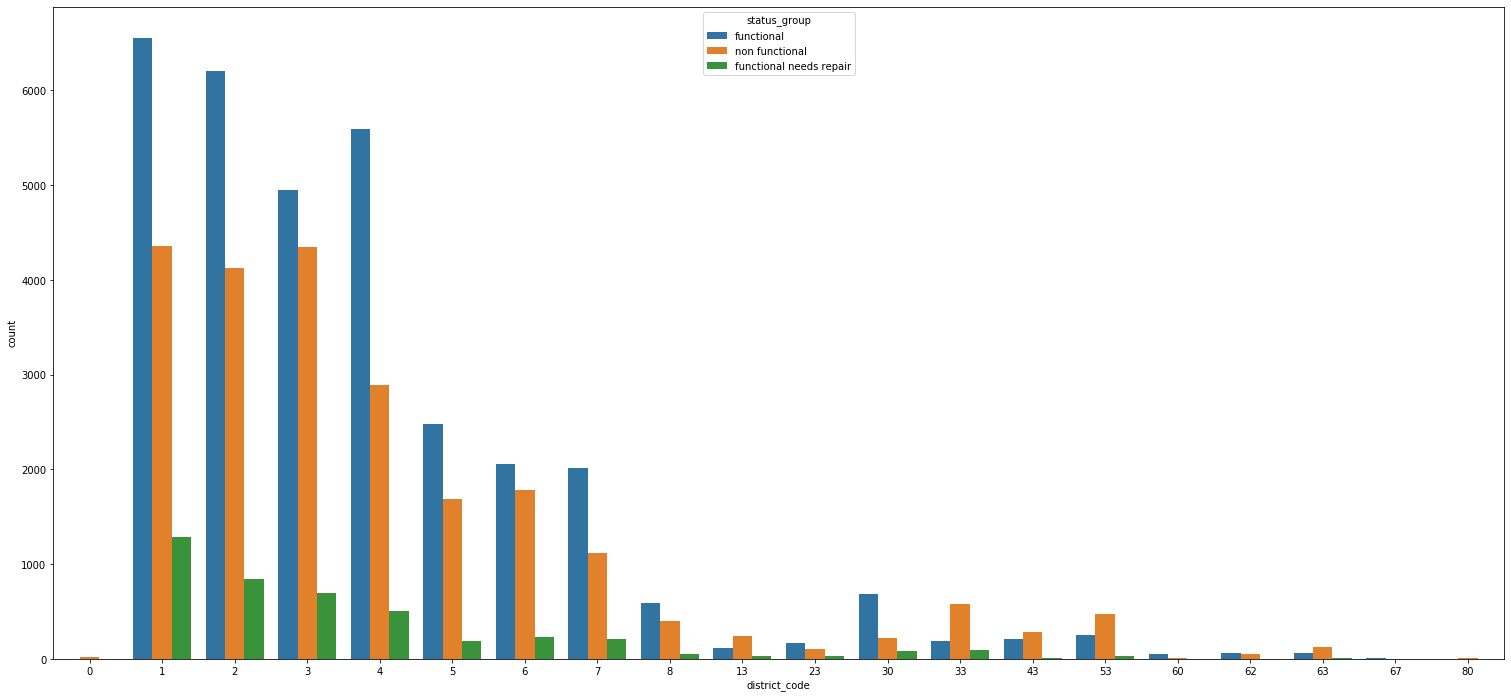

In [101]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='district_code', hue="status_group", data=df)

Some districts has higher chance to have functional water points.

### lga / ward columns

Now we decided to keep these columns because they contain geographical location. But, we have also other location features so maybe they will be dropped later on.

### public_meeting column

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
status_group             59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
basin                    59400 non-null object
region                   59400 non-null object
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
permit                   56344 non-null object
construction_year        59400 non-null int64
extraction_type_group    59400 non-null object
management               59400 non-null object
payment                  59400 non-null object
water_quality            59400 non-null object


In [119]:
df['public_meeting'].value_counts()

True     51014
False     5055
Name: public_meeting, dtype: int64

In [49]:
df['public_meeting'].fillna(value=True,inplace=True)

There are some null values and we convert them to most common data.

### permit column

In [121]:
df['permit'].value_counts()

True     38854
False    17492
Name: permit, dtype: int64

This column shows if the water point is permitted or not. There are 3056 null values for this column. We will change them to true which has higher amount.

In [50]:
df['permit'].fillna(value=True, inplace=True)

# Converting Target to Ternary Values

In [51]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [52]:
df['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

To make our model, we changed the target variable to 0,1 and 2 values.

And we create new csv file to keep our work and call new cleaned data.

In [53]:
df.to_csv('clean_data.csv')

In [53]:
### To see the relation between water quantity and quality with functionality
df.groupby(['quantity','water_quality','status_group']).count().head(50)

# Findings and Explorations

## Cleaning Process

- The data has lots of null values, missing values and unnecessary dublicated features. Two main challanges are in this project is cleaning data and handling highly imbalanced target labels. 
- We tried to solve cleaning challange in this notebook. Some columns which have same information were dropped. Null, wrong and missing values changed to mean, median or unknown. Some values in features collected together and categorized. 
- Detailed data cleaning processes can be found in this notebook under the headings of relevant columns. It is stated that how the column was cleaned with reasons. 

## Explorations

- Generally higher population areas has higher number of functional wells.
- Some areas has higher probability to find clean water especially, if they are near to good basins.
- Darul es Salaam is one of the highest populated cities but 35% of good water quality points are non-functional. 
- Iringa is one of the important areas but it contains lots of non-functional wateer points which has soft water.
- Mostly the wells which are funded by government are non-functional.
- Most of water points which central government and district council installed are non-functional.
- The most common extraction type is gravity but second is hand pumps. The efficiency of handpumps are less than commercial pumps. It shows that authorities need to focus on pumping type. It is seen that, there are many non-functional water points which belongs to gravity (which is natural force so no need to do anything expensive) as extraction type. 
- Some water points which has enough and soft water are non-function.
- The wells which have constructed in recent years are functional then olders. And it is seen that recent years have some functional but needs repair wells. It means that if they will not be repaired recently, they will be non-functional easily.
- There are lots of water wells which has enough water are non-functional. 

## Findings

- 4272 wells were dried but they have good water quality. With finding a solution to give source again these wells, they can be functional. Finding clean water sources is not the only problem, to continue to feed these sources are equaly important.
- 2226 (7%) wells have enough and soft water but needs repair. Authorities must invest on repairing. Otherwise these will be non-functional.
- 8035 (27%) wells has enough, good quality water but they are non-functional. This shows that authorities must work and invest on technology to pump these good sources. 
- Authorties should check again the wells which they funded.
- New tecqniques must be found to feed dry wells and repair wells. 


# Feature Engineering

- There are lots of categorical values in funder and installer columns. We create new columns that if the value in the feature is not in first common 20 values, they were collected as 'others'. Also, there are lots of spelling mistakes in this columns which creates new unique values in these columns. We found top 100 common installer and fixed them. Then, builded new column which has categorized values. 
- Construction years are in integer format but not continuous data or year values do not make sense for model. So, we divided them decades and assumed every decade as categorical value.
